In [1]:
import pickle
import pandas as pd
import numpy as np
import itertools
import re
import string
import math
from scipy import spatial
import gensim

In [2]:
def unpickle(path):
    return pickle.load(open(path, 'rb'))

In [29]:
courses = unpickle("./yaleocw-corpus/data/courses.pickle")
courses.head(2)

,Department,Course Number,Course Title,Professor Name,Date,Url,Author,Description,Sessions,Material Url,Course Structure
Cid,,,,,,,,,,,
0,African American Studies,AFAM 162,African American History: From Emancipation to...,Jonathan Holloway,Spring 2010,https://oyc.yale.edu//african-american-studies...,"{'name': 'Professor Jonathan Holloway', 'descr...",The purpose of this course is to examine the A...,"[{'title': 'Dawn of Freedom', 'url': 'https://...",http://openmedia.yale.edu/cgi-bin/open_yale/me...,"This Yale College course, taught on campus twi..."
1,American Studies,AMST 246,"Hemingway, Fitzgerald, Faulkner",Wai Chee Dimock,Fall 2011,https://oyc.yale.edu//american-studies/amst-246,"{'name': 'Professor Wai Chee Dimock', 'descrip...","This course examines major works by Hemingway,...","[{'title': 'Introduction', 'url': 'https://oyc...",http://openmedia.yale.edu/cgi-bin/open_yale/me...,"This Yale College course, taught on campus two..."


In [4]:
sessions = unpickle("./yaleocw-corpus/data/sessions.pickle")
sessions.head(2)

sessions = sessions.drop(sessions[sessions["Transcriptions"].isna()].index)
sessions = sessions.drop(sessions[sessions["Chapters"].isna()].index)
sessions = sessions.drop([453,454,821,881])


In [5]:
def splitTranscripts(session):
    _splits = []
    for _chapter in session:
        _sentences = _chapter.split(sep)
        _step = len(_sentences)/n
        _start, _end = 0, _step
        while _end<len(_sentences):
            _splits.append(sep.join(_sentences[int(_start):int(_end)]))
            _start = _end
            _end += _step
        _splits.append(sep.join(_sentences[int(_start):]))
    return _splits

def tokenize(_subchapter):
    _tokens = []
    for _word in re.sub(r'<|>|\.|,|:|\?|!"', '', _subchapter.lower()).split():
        if len(_word)>0:
            _tokens.append(_word)
    return _tokens

def gen_chapters_split(course, n = 1, sep = "."):
    for _session in course.Transcriptions:
        if _session is not None:
            for _chapter in _session:
                _sentences = _chapter.split(sep)
                _step = len(_sentences)/n
                _start, _end = 0, _step
                while _end<len(_sentences):
                    yield tokenize(sep.join(_sentences[int(_start):int(_end)]))
                    _start = _end
                    _end += _step
                yield tokenize(sep.join(_sentences[int(_start):]))
                
def gen_chapters(course):
    for _session in course.Transcriptions:
        if _session is not None:
            for _chapter in _session:
                yield tokenize(_chapter)
                
for cid, course in sessions.groupby("Cid"):
    for i, txt in enumerate(itertools.islice(gen_chapters(course), 0, 2)):
        print(cid, i, len(txt), txt[0:15])

0 0 1572 ['professor', 'jonathan', 'holloway', '“fellow', 'citizens', 'pardon', 'me', 'and', 'allow', 'me', 'to', 'ask', 'why', 'am', 'i']
0 1 458 ['this', 'class', 'is', 'about', 'the', 'post-emancipation', 'african', 'american', 'experience', 'it', 'is', 'about', 'american', 'history', 'and']
1 0 296 ['professor', 'wai', 'chee', 'dimock', 'we’re', 'going', 'to', 'get', 'started', 'and', 'let', 'me', 'just', 'explain', 'a']
1 1 216 ['instead', 'what', 'i’d', 'like', 'to', 'do', 'is', 'to', 'come', 'up', 'with', 'a', 'little', 'bit', 'of']
2 0 928 ['professor', 'charles', 'bailyn', 'some', 'things', 'about', 'this', 'course', 'this', 'is', 'a', 'course', 'for', 'non-scientists', 'that']
2 1 1240 ['all', 'right', 'the', 'particular', 'topics', 'that', 'are', 'under', 'discussion', 'i’ve', 'listed', 'them', 'here', 'in', 'green']
3 0 401 ['professor', 'mark', 'saltzman', 'this', 'is', 'a', 'course', 'a', 'version', 'of', 'which', 'i’ve', 'taught', 'almost', 'every']
3 1 2623 ['to', 'answ

In [16]:
_cs, _ss = [], []
for _cid, _course in sessions.groupby("Cid"):
    _cs.append(len(_course.Transcriptions))
    for _sid, _session in enumerate(_course.Transcriptions):
            if _session is not None:
                _ss.append(len(_session))
                for _chapter in _session:
                    print(_cid, _sid)
                    
print(pd.Series(_cs).mean(), pd.Series(_ss).mean())

0 0
0 0
0 0
0 0
0 0
0 0
0 1
0 1
0 1
0 1
0 1
0 2
0 2
0 2
0 2
0 2
0 2
0 3
0 3
0 3
0 3
0 3
0 4
0 4
0 4
0 5
0 5
0 5
0 6
0 6
0 6
0 6
0 7
0 7
0 7
0 7
0 7
0 7
0 8
0 8
0 8
0 8
0 8
0 9
0 9
0 9
0 9
0 10
0 10
0 10
0 10
0 10
0 11
0 11
0 11
0 12
0 12
0 12
0 12
0 12
0 12
0 13
0 13
0 13
0 13
0 14
0 14
0 14
0 14
0 14
0 14
0 15
0 15
0 15
0 15
0 15
0 15
0 16
0 16
0 16
0 17
0 17
0 17
0 17
0 18
0 18
0 18
0 18
0 18
0 19
0 19
0 19
0 19
0 19
0 19
0 19
0 20
0 20
0 20
0 20
0 20
0 21
0 21
0 21
0 21
0 21
0 21
0 21
0 22
0 22
0 22
0 22
0 22
0 22
0 22
0 22
0 22
0 23
0 23
0 23
0 23
0 23
0 24
0 24
0 24
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 2
1 2
1 2
1 2
1 2
1 2
1 2
1 3
1 3
1 3
1 3
1 3
1 3
1 3
1 3
1 3
1 4
1 4
1 4
1 4
1 4
1 4
1 4
1 4
1 4
1 5
1 5
1 5
1 5
1 5
1 5
1 5
1 5
1 5
1 5
1 6
1 6
1 6
1 6
1 6
1 6
1 6
1 6
1 7
1 7
1 7
1 7
1 7
1 7
1 7
1 7
1 8
1 8
1 8
1 8
1 8
1 8
1 8
1 8
1 9
1 9
1 9
1 9
1 9
1 9
1 9
1 9
1 9
1 10
1 10
1 10
1 10
1 10
1 10
1 10
1 10
1 10
1 10
1 10
1 11
1 11
1 11
1 11
1 1

17 32
17 32
17 32
17 33
17 33
17 33
17 33
17 33
17 33
17 33
17 33
17 34
17 34
17 34
17 34
17 34
17 34
17 34
17 35
17 35
17 35
17 35
17 35
17 35
17 35
17 35
17 35
17 35
17 35
17 35
17 35
17 35
17 35
17 35
17 35
17 35
17 35
17 35
17 35
17 35
17 35
17 35
17 35
17 35
17 35
17 35
17 36
17 36
17 36
17 36
17 36
17 36
17 36
17 37
17 37
17 37
17 37
17 37
17 37
17 38
17 38
17 38
17 38
17 38
17 38
17 38
17 38
18 0
18 0
18 0
18 0
18 0
18 0
18 1
18 1
18 1
18 1
18 1
18 2
18 2
18 2
18 2
18 2
18 2
18 3
18 3
18 3
18 3
18 3
18 3
18 4
18 4
18 4
18 4
18 4
18 5
18 5
18 5
18 5
18 5
18 5
18 6
18 6
18 6
18 6
18 6
18 6
18 7
18 7
18 7
18 7
18 7
18 7
18 7
18 8
18 8
18 8
18 8
18 8
18 8
18 9
18 9
18 9
18 9
18 9
18 9
18 9
18 10
18 10
18 10
18 10
18 10
18 10
18 11
18 11
18 11
18 11
18 11
18 11
18 11
18 12
18 12
18 12
18 12
18 12
18 13
18 13
18 13
18 13
18 13
18 13
18 14
18 14
18 14
18 14
18 14
18 15
18 15
18 15
18 15
18 15
18 15
18 16
18 16
18 16
18 16
18 16
18 16
18 17
18 17
18 17
18 17
18 17
18 17
18 17
18 18
18 1

37 15
37 15
37 15
37 15
37 16
37 16
37 16
37 16
37 17
37 17
37 17
37 17
37 17
37 18
37 18
37 18
37 18
37 18
37 18
37 18
37 19
37 19
37 19
37 19
37 19
37 19
37 20
37 20
37 20
37 20
37 20
37 20
37 20
37 21
37 21
37 21
37 21
37 21
37 22
37 22
37 22
37 22
37 22
37 23
37 23
37 23
37 23
37 23
37 23
37 24
37 24
37 24
38 0
38 0
38 0
38 0
38 0
38 0
38 0
38 0
38 0
38 0
38 1
38 1
38 1
38 1
38 1
38 1
38 1
38 2
38 2
38 2
38 2
38 2
38 2
38 2
38 2
38 3
38 3
38 3
38 3
38 3
38 4
38 4
38 4
38 4
38 4
38 5
38 5
38 5
38 5
38 5
38 6
38 6
38 6
38 6
38 6
38 6
38 7
38 7
38 7
38 7
38 7
38 8
38 8
38 8
38 8
38 8
38 9
38 9
38 9
38 9
38 9
38 10
38 10
38 10
38 10
38 10
38 10
38 10
38 10
38 11
38 11
38 11
38 11
38 11
38 11
38 12
38 12
38 12
38 12
38 13
38 13
38 13
38 13
38 14
38 14
38 14
38 14
38 14
38 15
38 15
38 15
38 15
38 15
38 15
38 15
38 15
38 16
38 16
38 16
38 16
38 16
38 16
38 17
38 17
38 17
38 17
38 17
38 18
38 18
38 18
38 18
38 18
38 18
38 19
38 19
38 19
38 19
38 20
38 20
38 20
38 20
38 20
38 21
38 21
38 21

In [25]:
documents = []
_c = 0
for _cid, _course in sessions.groupby("Cid"):
    documents += [gensim.models.doc2vec.TaggedDocument(doc, f"{_c}-{i}") for i, doc in enumerate(gen_chapters(_course))]
    _c += 1
len(documents)

5485

In [19]:
max_epochs = 50
vec_size = 300
alpha = 0.025
model = gensim.models.doc2vec.Doc2Vec(size=vec_size, workers=4, alpha=alpha, negative=5)
model.build_vocab(documents)

for epoch in range(max_epochs):
    print('iteration {0}'.format(epoch))
    model.train(documents, total_examples=model.corpus_count, epochs=model.iter)
model.save("yale_doc2vec_full_300.model")
#model.delete_temporary_training_data(keep_doctags_vectors=True, keep_inference=True)

iteration 0


/home/swnw/.local/lib/python3.6/site-packages/ipykernel_launcher.py:9: DeprecationWarning: Call to deprecated `iter` (Attribute will be removed in 4.0.0, use self.epochs instead).
  if __name__ == '__main__':


iteration 1
iteration 2
iteration 3
iteration 4
iteration 5
iteration 6
iteration 7
iteration 8
iteration 9
iteration 10
iteration 11
iteration 12
iteration 13
iteration 14
iteration 15
iteration 16
iteration 17
iteration 18
iteration 19
iteration 20
iteration 21
iteration 22
iteration 23
iteration 24
iteration 25
iteration 26
iteration 27
iteration 28
iteration 29
iteration 30
iteration 31
iteration 32
iteration 33
iteration 34
iteration 35
iteration 36
iteration 37
iteration 38
iteration 39
iteration 40
iteration 41
iteration 42
iteration 43
iteration 44
iteration 45
iteration 46
iteration 47
iteration 48
iteration 49


In [6]:
model = gensim.models.doc2vec.Doc2Vec.load("yale_doc2vec_full.model")

In [34]:
_vectors = []
for _cid, _course in sessions.groupby("Cid"):
    _vectors.append([model.infer_vector(_sentence) for _sentence in gen_chapters(_course)])

In [ ]:
pickle.dump(_vectors, open("vectors_doc2vec.pickle", 'wb'))

In [13]:
_vectors = pickle.load(open("vectors_doc2vec_sessions.pickle", 'rb'))

In [14]:
def dist(sampleA, sampleB):
    _e = 0
    for _f in range(len(sampleA)):
        _e =+ pow(sampleA[_f]-sampleB[_f], 2)
    return _e

In [20]:
label = []
euclidean = []
cosine = []
co_in, ch_in = (0,200), (0,25) 
for _cid, _course in enumerate(_vectors[co_in[0]:co_in[1]], co_in[0]):
    for _chapid, _chapter in enumerate(_course[ch_in[0]:ch_in[1]], ch_in[0]):
        print(str(_cid)+":"+str(_chapid))
        label.append(str(_cid)+":"+str(_chapid))
        _l = []
        _a = []
        for _bcid, _bcourse in enumerate(_vectors[co_in[0]:co_in[1]], co_in[0]):
            for _bchapid, _bchapter in enumerate(_bcourse[ch_in[0]:ch_in[1]], ch_in[0]):
                _l.append(dist(_chapter, _bchapter))
                _a.append(spatial.distance.cosine(_chapter, _bchapter))
        euclidean.append(_l)
        cosine.append(_a)

0:0
0:1
0:2
0:3
0:4
0:5
1:0
1:1
1:2
1:3
1:4
2:0
2:1
2:2
2:3
2:4
2:5
3:0
3:1
3:2
3:3
3:4
4:0
4:1
4:2
5:0
5:1
5:2
6:0
6:1
6:2
6:3
7:0
7:1
7:2
7:3
7:4
7:5
8:0
8:1
8:2
8:3
8:4
9:0
9:1
9:2
9:3
10:0
10:1
10:2
10:3
10:4
11:0
11:1
11:2
12:0
12:1
12:2
12:3
12:4
12:5
13:0
13:1
13:2
13:3
14:0
14:1
14:2
14:3
14:4
14:5
15:0
15:1
15:2
15:3
15:4
15:5
16:0
16:1
16:2
17:0
17:1
17:2
17:3
18:0
18:1
18:2
18:3
18:4
19:0
19:1
19:2
19:3
19:4
19:5
19:6
20:0
20:1
20:2
20:3
20:4
21:0
21:1
21:2
21:3
21:4
21:5
21:6
22:0
22:1
22:2
22:3
22:4
22:5
22:6
22:7
22:8
23:0
23:1
23:2
23:3
23:4
24:0
24:1
24:2
25:0
25:1
25:2
25:3
25:4
25:5
25:6
25:7
25:8
25:9
26:0
26:1
26:2
26:3
26:4
26:5
26:6
26:7
27:0
27:1
27:2
27:3
27:4
27:5
27:6
28:0
28:1
28:2
28:3
28:4
28:5
28:6
28:7
28:8
29:0
29:1
29:2
29:3
29:4
29:5
29:6
29:7
29:8
30:0
30:1
30:2
30:3
30:4
30:5
30:6
30:7
30:8
30:9
31:0
31:1
31:2
31:3
31:4
31:5
31:6
31:7
32:0
32:1
32:2
32:3
32:4
32:5
32:6
32:7
33:0
33:1
33:2
33:3
33:4
33:5
33:6
33:7
34:0
34:1
34:2
34:3
34:4
34:5
34:6
34

In [21]:
import matplotlib
import matplotlib.pyplot as plt

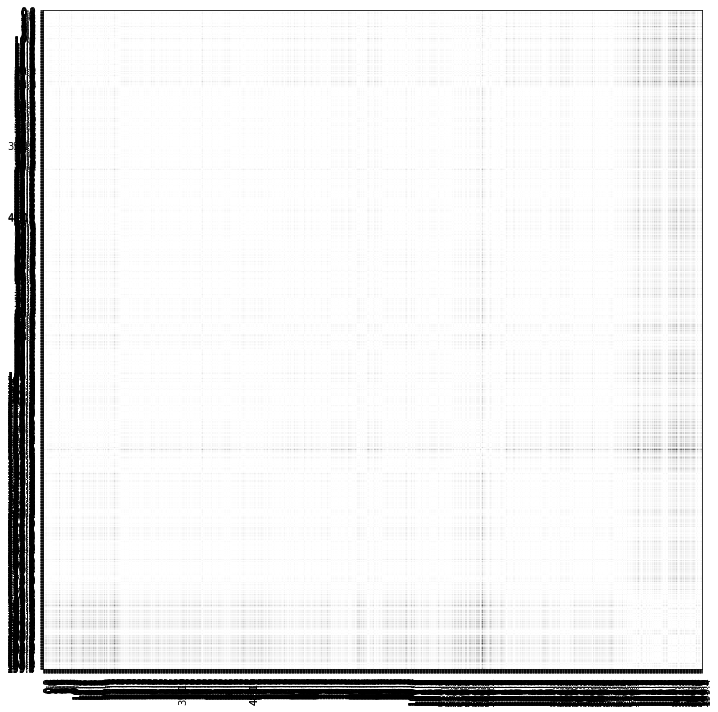

In [22]:
fig, ax = plt.subplots(figsize=(10,10))
im = ax.imshow(euclidean, cmap="Greys")

# We want to show all ticks...
ax.set_xticks(np.arange(len(label)))
ax.set_yticks(np.arange(len(label)))
# ... and label them with the respective list entries
ax.set_xticklabels(label)
ax.set_yticklabels(label)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=90, ha="right",
         rotation_mode="anchor")

fig.tight_layout()
plt.show()

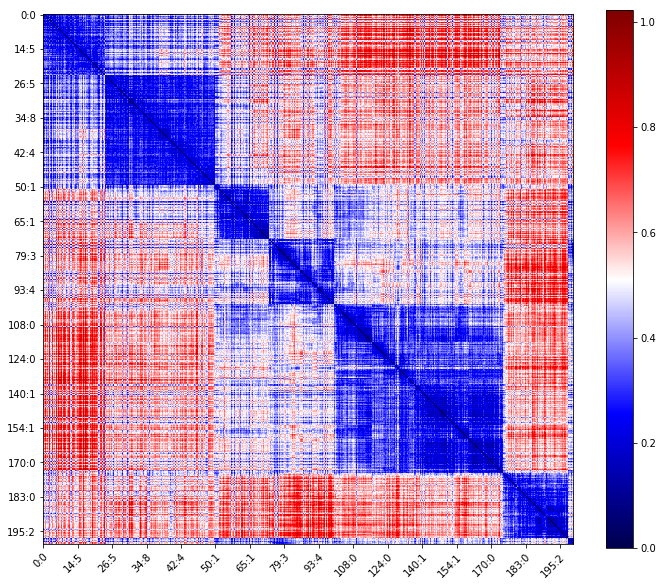

In [51]:
fig, ax = plt.subplots(figsize=(10,10))
im = ax.imshow(cosine, cmap="seismic")

# We want to show all ticks...
ax.set_xticks(np.arange(len(label)))
ax.set_yticks(np.arange(len(label)))
# ... and label them with the respective list entries

fig.colorbar(im, ax=ax ,shrink=0.77)
_ticking = np.arange(0, len(cosine), step=70)
plt.xticks(_ticking, np.array(label)[_ticking])
plt.yticks(_ticking, np.array(label)[_ticking])

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

fig.tight_layout()
plt.savefig('matrix.eps', format='eps', dpi=100)
plt.show()

In [ ]:
cosine[0]

In [ ]:
len(_vectors)

In [37]:
_vectors = []
for _cid, _course in sessions.groupby("Cid"):
    print(_cid)
    for _session in _course.Transcriptions:
        _v = []
        if _session is not None:
            for _chapter in _session:
                _v.append(model.infer_vector(tokenize(_chapter)))
        _vectors.append(_v)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39


In [38]:
_c = 0
for _cid, _course in sessions.groupby("Cid"):
    for _session in _course.Transcriptions:
        _v = []
        if _session is not None:
            for _chapter in _session:
                _c+=1
                pass
_c

5478

In [23]:
len(_vectors)

1058

In [39]:
pickle.dump(_vectors, open("vectors_doc2vec_sessions.pickle", 'wb'))